# CAR ACCIDENT SEVERITY

This is my final project for applied data science by IBM. The aim of this project is to be able to build a classification model that would be able to predict car accident severity based on provided datatset. The data set I used is a collision data for the state of San Fransico.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Load the Collision Datat">Load the Collision Data</a></li>
        <li><a href="#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
        <li><a href="#Modelling">Modelling</a></li>
        <li><a href="#Evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

# Load the Collision Data

In [1]:
#for basic operations
import pandas as pd
import numpy as np
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Collision = pd.read_csv("Data-Collisions.csv")
Collision.head(5)

C:\Users\Ayomikun14\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


This is the data that is to be analysed and used in the building of the various models. The data consist of 38 columns and 194673 rows. 

In [3]:
Collision.shape

(194673, 38)

In [4]:
Collision["ROADCOND"].isnull().value_counts()

False    189661
True       5012
Name: ROADCOND, dtype: int64

The column titles are all listed below along with their data types

In [5]:
Collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
Collision.isnull().any() ## Check for missing values that would affect my models.

SEVERITYCODE      False
X                  True
Y                  True
OBJECTID          False
INCKEY            False
COLDETKEY         False
REPORTNO          False
STATUS            False
ADDRTYPE           True
INTKEY             True
LOCATION           True
EXCEPTRSNCODE      True
EXCEPTRSNDESC      True
SEVERITYCODE.1    False
SEVERITYDESC      False
COLLISIONTYPE      True
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE       True
SDOT_COLCODE      False
SDOT_COLDESC      False
INATTENTIONIND     True
UNDERINFL          True
WEATHER            True
ROADCOND           True
LIGHTCOND          True
PEDROWNOTGRNT      True
SDOTCOLNUM         True
SPEEDING           True
ST_COLCODE         True
ST_COLDESC         True
SEGLANEKEY        False
CROSSWALKKEY      False
HITPARKEDCAR      False
dtype: bool

# Exploratory Data Analysis

Before I began this analysis, I dropped the following columns below as they would not be needed for any analysis.

In [7]:
Collision.drop(["OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "SDOTCOLNUM", "SPEEDING"], axis = 1, inplace= True)

In [8]:
Collision.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'LOCATION',
       'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'INCDTTM',
       'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

The data set is evaluated to see if there are missing values and how much of this values are missing.

In [9]:
Collision.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
STATUS                 0
ADDRTYPE            1926
LOCATION            2677
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [10]:
Collision.shape

(194673, 29)

In [11]:
Collision.drop(["LOCATION"], axis = 1, inplace = True) #I dropped this row because it would not be needed for analysis

In [12]:
Address_freq = Collision["ADDRTYPE"].value_counts()
Address_freq

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

From the above cell, we can see in the address type column, there are three unique values which are **Block**, **Intersection** and **Alley**. **Block** is the most common place where accidents occur the most while **Alley** is the address type where accidents occur the least. The Bar Chart below shows the graphical representation of the frequency of accident occurences at each of these address type.

Text(0, 0.5, 'Count')

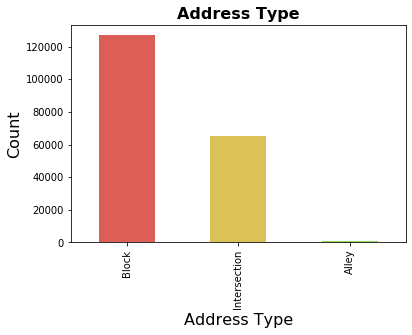

In [13]:
ax = Address_freq.plot(kind = "bar", color = sns.color_palette("hls", 8))
ax.set_title('Address Type', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Address Type", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict = {'fontsize' : 16})

In [14]:
Collision['ADDRTYPE'].value_counts().idxmax()

'Block'

From the graph above, we can come to the conclusion that the address type **Block** is where accidents occur the most. Having determined that this is the most common address type, I replaced the missing cells in this field with the most common which is the **Block** address type.

In [15]:
#replace the missing address type with the values by the most frequent type.
Collision["ADDRTYPE"].replace(np.nan, "Block", inplace=True)

In [16]:
Collision["ADDRTYPE"].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [17]:
Collision["ADDRTYPE"].isnull().sum()

0

Having looked at the Address type, I shifted my attention to Collision type to see which types of collisions occur.

In [18]:
Collision_type = Collision["COLLISIONTYPE"].value_counts()
Collision_type

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Text(0, 0.5, 'Count')

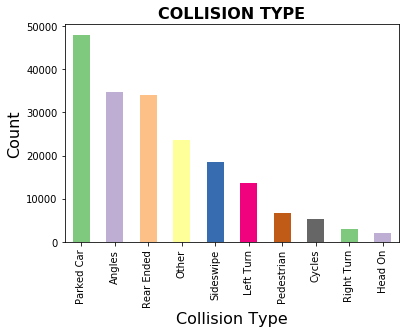

In [19]:
ax = Collision_type.plot(kind = "bar", color =sns.color_palette("Accent"))
ax.set_title('COLLISION TYPE', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Collision Type", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict = {'fontsize' : 16})

From the bar chart above, it is shown that **Parked Car** is the most common collision type which occurs when an accident happens

In [20]:
Collision["COLLISIONTYPE"].isnull().sum()

4904

In [21]:
#replace the missing collision type with the values by the most frequent type.
Collision["COLLISIONTYPE"].replace(np.nan, "Parked Car", inplace=True)

Given that **Parked Car** is the most common collision type, it was used to replace the missing data values(4904 missing values).

In [22]:
Collision["COLLISIONTYPE"].value_counts()

Parked Car    52891
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

Following the Collision type,i examined the Junctions where accidents occur and saw that these junctions are the junctions where accidents occur the most.
**Mid-Block (not related to intersection)            
At Intersection (intersection related)               
Mid-Block (but intersection related)                 
Driveway Junction                                    
At Intersection (but not related to intersection)    
Ramp Junction                                          
Unknown**

In [23]:
Junction_type = Collision["JUNCTIONTYPE"].value_counts()
Junction_type

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

Text(0, 0.5, 'Count')

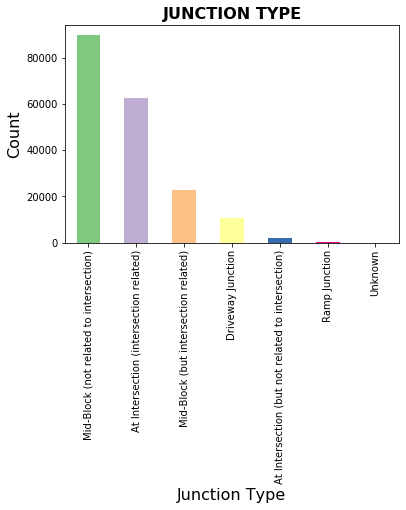

In [24]:
ax = Junction_type.plot(kind = "bar", color = sns.color_palette("Accent"))
ax.set_title('JUNCTION TYPE', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Junction Type", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict = {'fontsize' : 16})

**Mid-Block(not related to intersection)** is junction type where accidents occur the most according to the above bar chart.

In [25]:
Collision["JUNCTIONTYPE"].isnull().sum()

6329

In [26]:
Collision["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace = True)

Given that **Mid-Block(not related to intersection)** is the most common Junction type, I used it to replace the missing values that existed within the column of the data set.

Then, taking a deeper look into the **INATTENTIONIND**, when I checked to examine the kind of values that existed, saw that only one value was common which was **Y**. 

In [27]:
Collision["INATTENTIONIND"].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

Given that the value **Y** is the most common value, i would suggest that the value **N** which means NO would be the substitute value which would fill in the blank spaces

In [28]:
Collision["INATTENTIONIND"].replace(np.nan, "N", inplace = True)

In [29]:
Attention = Collision["INATTENTIONIND"].value_counts()
Attention

N    164868
Y     29805
Name: INATTENTIONIND, dtype: int64

Checking the bar chart below, we can then see that more accidents occur when drivers are attentive then when they are not.

Text(0, 0.5, 'Count')

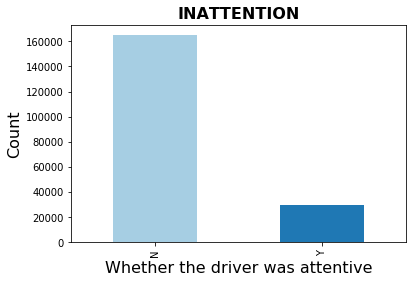

In [30]:
ax = Attention.plot(kind = "bar", color = sns.color_palette("Paired"))
ax.set_title('INATTENTION', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Whether the driver was attentive", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict= {'fontsize' : 16})

In [31]:
Collision["UNDERINFL"].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [32]:
Collision["UNDERINFL"].isnull().sum()

4884

In [33]:
Collision["UNDERINFL"].replace(np.nan, "N", inplace=True)

In [34]:
weather = Collision["WEATHER"].value_counts()

Text(0, 0.5, 'Weather')

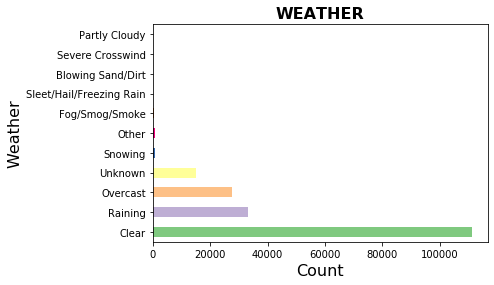

In [35]:
ax = weather.plot(kind = "barh", color = sns.color_palette("Accent"))
ax.set_title('WEATHER', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Count", fontdict = {'fontsize' : 16})
ax.set_ylabel("Weather", fontdict= {'fontsize' : 16})

Weather is another factor that affects the rate at which acidents occur. From the above graph, when the weather is clear the accident count is at the highest of more than a 100,000. This means that it is not always when the weather is bad that accidents would occur the most.

Since the **Clear** is the most common weather type, it was used to replace the missing values within the data.

In [36]:
Collision["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [37]:
Road_cond = Collision["ROADCOND"].value_counts()
Road_cond

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

Text(0, 0.5, 'Count')

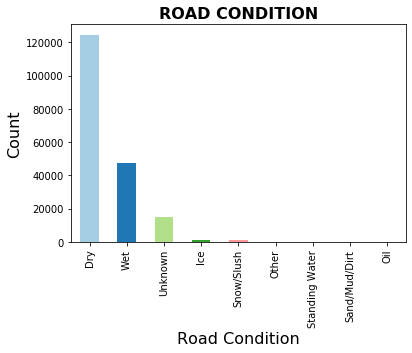

In [38]:
ax = Road_cond.plot(kind = "bar", color = sns.color_palette("Paired"))
ax.set_title('ROAD CONDITION', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Road Condition", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict= {'fontsize' : 16})

Looking at the road condition, we can see that accidents occur the most when the road is **Dry** followed by **Wet**

In [39]:
Collision["ROADCOND"].isnull().sum()

5012

Replace the missing values with the most common Road condition which is **Dry**

In [40]:
Collision["ROADCOND"].replace(np.nan, "Dry", inplace=True)

In [41]:
light_cond = Collision["LIGHTCOND"].value_counts()
light_cond

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

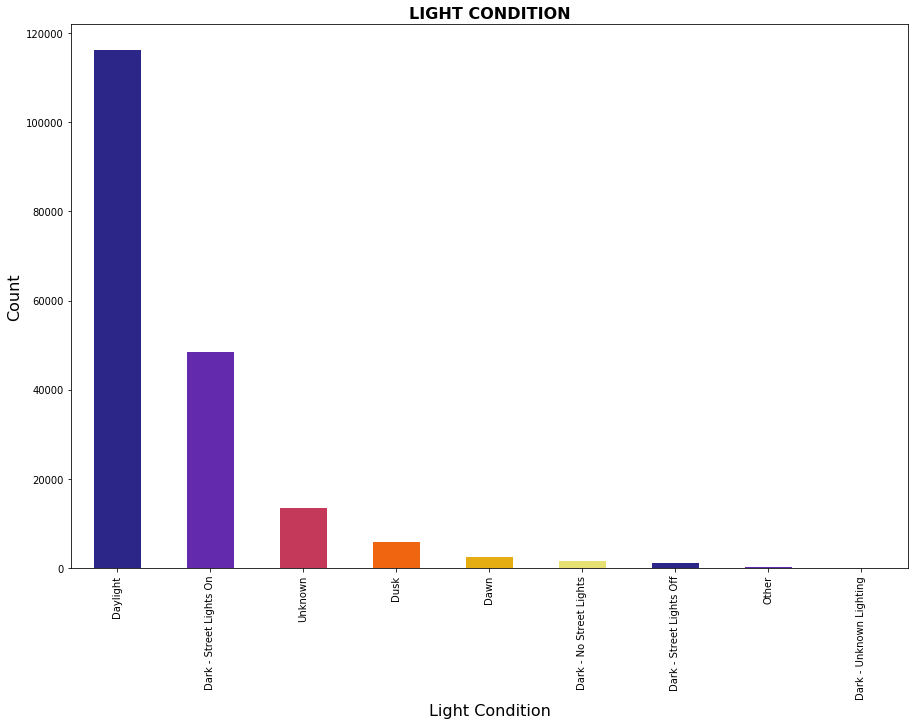

In [42]:
plt.figure(figsize=(15,10))
ax = light_cond.plot(kind= "bar", color = sns.color_palette("CMRmap"))
ax.set_title('LIGHT CONDITION', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Light Condition", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict= {'fontsize' : 16})
plt.savefig("LIGHT CONDITIONS 2")

Examining the Light Condition, it is seen that most accidents occur in the **Daylight** than in the **Dark** as shown in the bar chart above. Since **Daylight** is the most common Light Condition, I used it to replace all the missing values that occured in this column.

In [43]:
Collision["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)

The next factor I examined was whether the pedestrian right of way was infringed on during this accidents. Then, taking a deeper look into the **PEDESTRIAN RIGHT OF WAY**, when I checked to examine the kind of values that existed, saw that only one value was common which was Y

In [44]:
Collision["PEDROWNOTGRNT"].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

Given that the value **Y** is the most common value, i would suggest that the value **N** which means NO would be the substitute value which would fill in the blank spaces

In [45]:
Collision["PEDROWNOTGRNT"].replace(np.nan, "N", inplace = True)

In [46]:
ped_right = Collision["PEDROWNOTGRNT"].value_counts()
ped_right

N    190006
Y      4667
Name: PEDROWNOTGRNT, dtype: int64

Text(0, 0.5, 'Count')

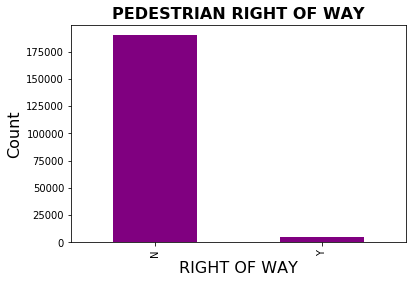

In [47]:
ax = ped_right.plot(kind = "bar", color = "purple")
ax.set_title('PEDESTRIAN RIGHT OF WAY', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("RIGHT OF WAY", fontdict = {'fontsize' : 16})
ax.set_ylabel("Count", fontdict= {'fontsize' : 16})

From the graph above, we see that most accidents according to the data gotten occurred when right of way of pesdetrians where infringed upon.

I removed columns that I felt I would not need for further analysis.

In [48]:
Collision.drop(["X", "Y", "ST_COLCODE", "ST_COLDESC"], axis = 1, inplace = True)

I checked to make sure that there was no null value within the dataset.

In [49]:
Collision.isnull().sum()

SEVERITYCODE      0
STATUS            0
ADDRTYPE          0
SEVERITYCODE.1    0
SEVERITYDESC      0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INCDTTM           0
JUNCTIONTYPE      0
SDOT_COLCODE      0
SDOT_COLDESC      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SEGLANEKEY        0
CROSSWALKKEY      0
HITPARKEDCAR      0
dtype: int64

After replacing the missing vlaues with the most common type of each value in each column, we can see that there are no more missing values within the data set. It has been cleaned.

In [50]:
Collision.drop(["STATUS"], axis = 1,inplace = True)

In [51]:
Collision.head(5)

,SEVERITYCODE,ADDRTYPE,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,...,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Overcast,Wet,Daylight,N,0,0,N
1,1,Block,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",N,0,Raining,Wet,Dark - Street Lights On,N,0,0,N
2,1,Block,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,0,Overcast,Dry,Daylight,N,0,0,N
3,1,Block,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,N,Clear,Dry,Daylight,N,0,0,N
4,2,Intersection,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,0,Raining,Wet,Daylight,N,0,0,N


In [52]:
Collision.shape

(194673, 23)

In [53]:
Collision.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
SEVERITYCODE.1     int64
SEVERITYDESC      object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INCDATE           object
INCDTTM           object
JUNCTIONTYPE      object
SDOT_COLCODE       int64
SDOT_COLDESC      object
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SEGLANEKEY         int64
CROSSWALKKEY       int64
HITPARKEDCAR      object
dtype: object

After looking at the datatypes and the descriptions of each if the columsn within the dataset, I removed columns that would not be need for the predictive model that I wanted to build.

In [54]:
Collision.drop(["SEVERITYCODE.1", "SEVERITYDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "SEGLANEKEY", "CROSSWALKKEY", "UNDERINFL"], axis=1, inplace = True)

In [55]:
Collision.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,N,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,N,Raining,Wet,Dark - Street Lights On,N,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,N,Overcast,Dry,Daylight,N,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,N,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Raining,Wet,Daylight,N,N


In [56]:
Collision.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
SDOT_COLCODE       int64
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
HITPARKEDCAR      object
dtype: object

Following the removal of unwanted columns and looking at the datatypes, I did a count of both the severity code to see which ones were common within the reported accident cases. From the count below, we can see that: number code **1** which represents property damage is the most common, followed by 2 which is injury to persons.

In [57]:
Collision["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [58]:
Collision["ADDRTYPE"].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

After the count, I wanted to see the percentage of the accidents that occur at the three listed address in the dataset.

In [59]:
Collision.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize = True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.764947
              2               0.235053
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

Therefore, we see that for both **Alley and Block** most of the accidents that occur within these address mostly result in property damage, while there are higher rates of accidents leading to injuries occuring at **Intersections**

In [60]:
Collision.groupby(["COLLISIONTYPE"])["SEVERITYCODE"].value_counts(normalize = True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.929988
               2               0.070012
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Name: SEVERITYCODE, dtype: float64

Next up is the collison type which explains the type of collisions that occur. Looking at the information above, we see that accidents of type **Angles, Cycles, Left turn, Other, Parked Car, Pesdestrian, Right Turn and Sideswipe** mostly result in property damage as there are lesser accidents resulting in injuries. However, accidents of type **Head On and Rear Ended** have a high percentage of accidents resulting in injuries though it is not as much as the rate of property damages occur.

In [61]:
Collision[["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]].describe()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,194673.000000,194673.000000,194673.000000,194673.000000
mean,2.444427,0.037139,0.028391,1.920780
std,1.345929,0.198150,0.167413,0.631047
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,2.000000
75%,3.000000,0.000000,0.000000,2.000000
max,81.000000,6.000000,2.000000,12.000000


A stastical summary was then carried out on the"PERSONCOUNT": this is the number of people affected durin the accident, "PEDCOUNT": these are the pedestrians that were affected during the accident, "PEDCYLCOUNT": these are the number of bicycles affected by the accident and"VEHCOUNT": the number of vehicles affected by the accidents.

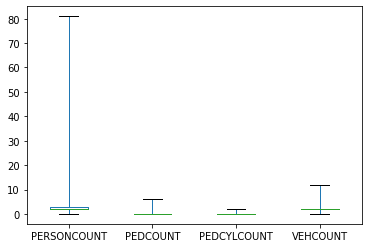

In [62]:
Collision[["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]].plot(kind = "box", whis = "range")

After the statistical summary, I contiuned examining the percentage of each type of accidents with respect to the the various columns that I would use as variables to create my predictive model.

In [63]:
Collision.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True)

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1               0.703051
                                                   2               0.296949
At Intersection (intersection related)             1               0.567362
                                                   2               0.432638
Driveway Junction                                  1               0.696936
                                                   2               0.303064
Mid-Block (but intersection related)               1               0.679816
                                                   2               0.320184
Mid-Block (not related to intersection)            1               0.793985
                                                   2               0.206015
Ramp Junction                                      1               0.674699
                                                   2               0.325301
Unknown                 

In [64]:
Collision.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize = True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.682281
                          2               0.317719
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [65]:
Collision.groupby(["ROADCOND"])["SEVERITYCODE"].value_counts(normalize = True)

ROADCOND        SEVERITYCODE
Dry             1               0.682494
                2               0.317506
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [66]:
Collision.groupby(["LIGHTCOND"])["SEVERITYCODE"].value_counts(normalize = True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.673275
                          2               0.326725
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [67]:
Collision.groupby(["HITPARKEDCAR"])["SEVERITYCODE"].value_counts(normalize = True)

HITPARKEDCAR  SEVERITYCODE
N             1               0.691983
              2               0.308017
Y             1               0.937916
              2               0.062084
Name: SEVERITYCODE, dtype: float64

In [68]:
Collision.groupby(["PEDROWNOTGRNT"])["SEVERITYCODE"].value_counts(normalize = True)

PEDROWNOTGRNT  SEVERITYCODE
N              1               0.715898
               2               0.284102
Y              2               0.901436
               1               0.098564
Name: SEVERITYCODE, dtype: float64

# Pre-processing:  Feature selection/extraction

Now, I began to assign dummy variables to each of the unique values within each column to make it easier to build my model.

For the **ADDRESSTYPE**, I attached the following numbers to each unique variable:
Block - 0,
Intersection - 1,
Alley - 2

In [69]:
Collision["ADDRTYPE"].replace(to_replace=['Block','Intersection', 'Alley'], value=[0,1,2],inplace=True) 

For the **COLLISIONTYPE**, I attached the following numbers to the unique items within the column:
Angles - 0
Cycles - 1
Head On - 2
Left Turn - 3
Other - 4
Parked Car - 5
Pedestrian - 6
Rear Ended - 7
Right Turn - 8
Sideswipe - 9

In [70]:
Collision["COLLISIONTYPE"].replace(to_replace=['Angles','Cycles','Head On', 'Left Turn', 'Other', 'Parked Car', 'Pedestrian', 'Rear Ended', 'Right Turn', 'Sideswipe'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

For the **JUNCTIONTYPE**, I attached the following numbers to unique items: 
At Intersection (but not related to intersection) - 0;
At Intersection (intersection related) - 1;
Driveway Junction - 2;
Mid-Block (but intersection related) - 3;
Mid-Block (not related to intersection) - 4;
Ramp Junction - 5;
Unknown - 6;

In [71]:
Collision["JUNCTIONTYPE"].replace(to_replace=['At Intersection (but not related to intersection)','At Intersection (intersection related)', 'Driveway Junction', 'Mid-Block (but intersection related)', 'Mid-Block (not related to intersection)', 'Ramp Junction', 'Unknown'], value=[0,1,2,3,4,5,6],inplace=True) 

For the **INATTENTIONID**, I attached to the unique values the numbers:
N - 0;
Y - 1;

In [72]:
Collision['INATTENTIONIND'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

For the **WEATHER**:
"Blowing Sand/Dirt" - 0,
"Clear" - 1,
"Fog/Smog/Smoke" - 2,
"Other" - 3,
"Overcast" - 4,
"Partly Cloudy" - 5,
"Raining" - 6,
"Severe Crosswind" - 7,
"Snowing" - 8,
"Sleet/Hail/Freezing Rain" - 9,
"Unknown" - 10

In [73]:
Collision['WEATHER'].replace(to_replace=["Blowing Sand/Dirt", "Clear", "Fog/Smog/Smoke", "Other", "Overcast", "Partly Cloudy", "Raining", "Severe Crosswind","Snowing", "Sleet/Hail/Freezing Rain", "Unknown"], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True) 

For the **ROAD CONDITION**:
"Dry" - 0,
"Ice" - 1,
"Oil" - 2,
"Other" - 3,
"Sand/Mud/Dirt" - 4,
"Snow/Slush" - 5,
"Standing Water" - 6,
"Unknown" - 7, 
"Wet" - 8

In [74]:
Collision["ROADCOND"].replace(to_replace = ["Dry", "Ice", "Oil", "Other", "Sand/Mud/Dirt", "Snow/Slush", "Standing Water", "Unknown", "Wet"], value=[0,1,2,3,4,5,6,7,8], inplace=True)

For the **LIGHT CONDITION**:
"Dark - No Street Lights" - 0,
"Dark - Street Lights Off" - 1,
"Dark - Street Lights On" - 2,
"Dark - Unknown Lighting" - 3,
"Dawn" - 4,
"Daylight" - 5,
"Dusk" - 6,
"Other" - 7

In [75]:
Collision["LIGHTCOND"].replace(to_replace = ["Dark - No Street Lights", "Dark - Street Lights Off", "Dark - Street Lights On", "Dark - Unknown Lighting", "Dawn", "Daylight", "Dusk", "Other"], value = [0,1,2,3,4,5,6,7], inplace = True)

For the **HITPARKEDCAR**, I attached to the unique values the numbers:
N - 0;
Y - 1;

In [76]:
Collision['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

For the **PEDROWNOTGRNT**, I attached to the unique values the numbers:
N - 0;
Y - 1;

In [77]:
Collision['PEDROWNOTGRNT'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

In [78]:
Collision.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,HITPARKEDCAR
0,2,1,0,2,0,0,2,1,11,0,4,8,5,0,0
1,1,0,9,2,0,0,2,4,16,0,6,8,2,0,0
2,1,0,5,4,0,0,3,4,14,0,4,0,5,0,0
3,1,0,4,3,0,0,3,4,11,0,1,0,5,0,0
4,2,1,0,2,0,0,2,1,11,0,6,8,5,0,0


In [79]:
Collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    194673 non-null  int64 
 1   ADDRTYPE        194673 non-null  int64 
 2   COLLISIONTYPE   194673 non-null  int64 
 3   PERSONCOUNT     194673 non-null  int64 
 4   PEDCOUNT        194673 non-null  int64 
 5   PEDCYLCOUNT     194673 non-null  int64 
 6   VEHCOUNT        194673 non-null  int64 
 7   JUNCTIONTYPE    194673 non-null  int64 
 8   SDOT_COLCODE    194673 non-null  int64 
 9   INATTENTIONIND  194673 non-null  int64 
 10  WEATHER         194673 non-null  int64 
 11  ROADCOND        194673 non-null  int64 
 12  LIGHTCOND       194673 non-null  object
 13  PEDROWNOTGRNT   194673 non-null  int64 
 14  HITPARKEDCAR    194673 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 22.3+ MB


After converting the string data type to integar data types, I selected the columns needed to build my model.

In [80]:
from sklearn import preprocessing
X= Collision[["ADDRTYPE", "COLLISIONTYPE","PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "JUNCTIONTYPE", "INATTENTIONIND", "WEATHER","ROADCOND","PEDROWNOTGRNT", "HITPARKEDCAR"]].values.astype("float")
X[0:5]

array([[1., 0., 2., 0., 0., 2., 1., 0., 4., 8., 0., 0.],
       [0., 9., 2., 0., 0., 2., 4., 0., 6., 8., 0., 0.],
       [0., 5., 4., 0., 0., 3., 4., 0., 4., 0., 0., 0.],
       [0., 4., 3., 0., 0., 3., 4., 0., 1., 0., 0., 0.],
       [1., 0., 2., 0., 0., 2., 1., 0., 6., 8., 0., 0.]])

In [81]:
Y = Collision["SEVERITYCODE"].values
Y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

# CLASSIFICATION

Now,I split the data into train and test data and used the training set to build an accurate model. I then use the test set to report the accuracy of the model I used the following algorithm:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

# K Nearest Neighbor(KNN)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=109)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 12) (155738,)
Test set: (38935, 12) (38935,)


In [84]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68845512, 0.73466033, 0.73365866, 0.74187749, 0.73702324,
       0.74719404, 0.7424939 , 0.74855528, 0.74367536])

In [85]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [88]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

KNN_jaccard = jaccard_similarity_score(y_test, yhat)
print("The Jaccard score for the KNN model is: ", KNN_jaccard)

KNN_f1 = f1_score(y_test, yhat, average='weighted')
print("The  F1 score for KNN model is: ",KNN_f1)

The Jaccard score for the KNN model is:  0.7485552844484397
The  F1 score for KNN model is:  0.7100339075667711


# SVM: SUPPORT VECTOR MACHINE

In [89]:
from sklearn import svm
function = svm.SVC(kernel='rbf')
function.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
yhat2 = function.predict(X_test)
yhat2[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [92]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     27163
           2       0.71      0.29      0.41     11772

    accuracy                           0.75     38935
   macro avg       0.73      0.62      0.62     38935
weighted avg       0.74      0.75      0.71     38935

Confusion matrix, without normalization
[[26712   451]
 [ 9226  2546]]


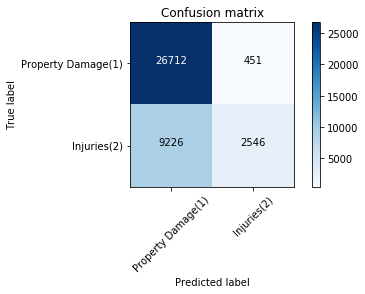

In [101]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injuries(2)'],normalize= False,  title='Confusion matrix')

In [95]:
f1_score(y_test, yhat2, average='weighted')

0.6949033232680234

In [96]:
jaccard_similarity_score(y_test, yhat2)

C:\Users\Ayomikun14\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7514575574675741

# Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
yhat3 = LR.predict(X_test)

In [104]:
print(confusion_matrix(y_test, yhat3, labels=[1,2]))

[[26349   814]
 [ 8964  2808]]


Confusion matrix, without normalization
[[26349   814]
 [ 8964  2808]]


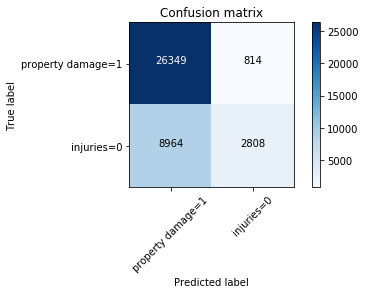

In [105]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['property damage=1','injuries=2'],normalize= False,  title='Confusion matrix')

In [106]:
print (classification_report(y_test, yhat3))

              precision    recall  f1-score   support

           1       0.75      0.97      0.84     27163
           2       0.78      0.24      0.36     11772

    accuracy                           0.75     38935
   macro avg       0.76      0.60      0.60     38935
weighted avg       0.75      0.75      0.70     38935



In [108]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat3)

0.7488634904327726

In [109]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat3)

24.096532751507773

# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
predTree = decisionTree.predict(X_test)

In [113]:
print (predTree [0:5])

[1 1 1 1 1]


In [114]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7487864389366894


# Report
Report on the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.75    | 0.71     | NA      |
| Decision Tree      | 0.75    | 0.75     | NA      |
| SVM                | 0.75    | 0.70     | NA      |
| LogisticRegression | 0.75    | 0.70     | 0.24    |

Based on the report gotten created after calculating the accuracy of the various algorithms used, the most accurate algorithm is the **Decision Tree** algorithm.